- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

In [71]:
data1 = pd.read_csv('Pizza.csv')
data1.head(120)

brand     id   mois   prot    fat   ash  sodium   carb   cal
0       A  14069  27.82  21.43  44.87  5.11    1.77   0.77  4.93
1       A  14053  28.49  21.26  43.89  5.34    1.79   1.02  4.84
2       A  14025  28.35  19.99  45.78  5.08    1.63   0.80  4.95
3       A  14016  30.55  20.15  43.13  4.79    1.61   1.38  4.74
4       A  14005  30.49  21.28  41.65  4.82    1.64   1.76  4.67
5       A  14075  31.14  20.23  42.31  4.92    1.65   1.40  4.67
6       A  14082  31.21  20.97  41.34  4.71    1.58   1.77  4.63
7       A  14097  28.76  21.41  41.60  5.28    1.75   2.95  4.72
8       A  14117  28.22  20.48  45.10  5.02    1.71   1.18  4.93
9       A  14133  27.72  21.19  45.29  5.16    1.66   0.64  4.95
10      A  14101  27.35  21.20  45.59  4.94    1.65   0.92  4.98
11      A  14108  26.98  21.20  45.03  5.15    1.67   1.64  4.97
12      A  14164  28.70  20.00  45.12  4.93    1.56   1.25  4.91
13      A  14154  30.91  19.65  42.45  4.81    1.65   2.81  4.72
14      A  24005  30.91  20.77  42.03  4.90    1.61   1.39  4.67
15      A  24026  30.83  17.88  44.33  5.26    1.76   1.70  4.77
16      A  24094  32.73  20.06  39.74  5.24    1.69   2.23  4.47
17      A  24108  34.58  17.53  40.87  5.05    1.61   1.97  4.46
18      A  24102  31.80  20.35  40.44  5.43    1.61   1.98  4.53
19      A  24082  31.02  19.05  42.29  5.27    1.71   2.37  4.66
20      A  34017  27.02  19.56  47.20  4.95    1.65   1.27  5.08
21      A  34020  27.78  20.01  45.59  4.97    1.70   1.65  4.97
22      A  24136  30.88  20.58  42.26  4.96    1.63   1.32  4.68
23      A  24122  32.20  19.25  43.42  4.62    1.50   0.51  4.70
24      A  24115  33.19  18.05  41.88  5.22    1.70   1.66  4.56
25      A  34012  30.43  19.78  44.20  4.80    1.61   0.79  4.80
26      A  34006  28.93  19.99  45.20  4.78    1.62   1.10  4.91
27      A  24146  30.41  18.71  43.99  4.86    1.62   2.03  4.79
28      A  24138  29.62  21.10  43.37  5.05    1.69   0.86  4.78
29      B  14015  49.57  13.70  29.07  3.62    1.10   4.04  3.33
..    ...    ...    ...    ...    ...   ...     ...    ...   ...
90      D  14116  47.61  22.44  19.61  4.06    0.60   6.28  2.91
91      D  14128  46.91  21.79  21.17  4.06    0.76   6.07  3.02
92      D  14107  46.88  21.71  23.60  4.59    0.75   3.22  3.12
93      D  14050  47.49  21.75  20.83  4.01    0.67   5.92  2.98
94      D  14013  48.03  21.96  20.88  4.02    0.70   5.11  2.96
95      D  14004  49.16  27.99  17.49  3.29    0.39   2.07  2.78
96      D  14003  47.17  22.29  21.30  4.08    0.74   5.16  3.02
97      D  14037  47.29  21.48  21.69  4.03    0.67   5.51  3.03
98      D  14023  47.53  21.11  21.54  4.02    0.70   5.80  3.02
99      D  14059  47.86  22.25  19.53  4.04    0.68   6.32  2.90
100     D  14163  48.09  22.65  21.59  5.22    0.93   2.45  2.95
101     D  14150  47.73  22.38  21.39  5.21    0.99   3.29  2.95
102     D  14140  48.44  22.73  21.05  5.22    0.98   2.56  2.91
103     D  24007  47.43  22.13  21.01  4.09    0.72   5.34  2.99
104     D  24021  47.68  21.84  20.45  4.06    0.71   5.97  2.95
105     D  24011  48.05  22.05  20.57  4.04    0.70   5.29  2.94
106     D  24030  48.01  21.31  21.05  4.01    0.73   5.62  2.97
107     D  34009  47.45  22.37  20.97  4.06    0.70   5.15  2.99
108     D  24039  47.80  22.36  20.39  4.02    0.70   5.43  2.95
109     D  24044  48.31  22.49  19.53  4.18    0.62   5.49  2.88
110     D  34004  46.19  21.19  25.18  4.66    0.80   2.78  3.23
111     D  24153  48.81  22.43  18.68  4.10    0.72   5.98  2.82
112     D  24143  48.89  22.95  21.93  5.26    0.85   0.97  2.93
113     D  24134  47.91  22.22  20.40  4.07    0.56   5.40  2.94
114     D  24123  46.28  21.51  25.44  4.58    0.60   2.19  3.24
115     D  24114  46.29  21.43  26.00  4.71    0.69   1.57  3.26
116     D  24084  47.03  20.84  25.68  4.52    0.69   1.93  3.22
117     D  24092  46.80  20.70  25.10  4.55    0.70   2.85  3.20
118     D  24043  52.19  26.00  16.64  4.17    0.61   1.00  2.58
119     E  14089  34.58   7.44  16.24  

# Pour répondre aux premières questions nous ferons une ACP

In [76]:

x=data1.iloc[:,2:9].values
x


array([[27.82, 21.43, 44.87, ...,  1.77,  0.77,  4.93],
       [28.49, 21.26, 43.89, ...,  1.79,  1.02,  4.84],
       [28.35, 19.99, 45.78, ...,  1.63,  0.8 ,  4.95],
       ...,
       [44.55, 11.01, 16.03, ...,  0.64, 25.98,  2.92],
       [47.6 , 10.43, 15.18, ...,  0.56, 24.47,  2.76],
       [46.84,  9.91, 15.5 , ...,  0.57, 25.48,  2.81]])

In [77]:

y=data1.iloc[:,0].values
y

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G

In [78]:


# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

In [79]:
# Application de la fonction StandardScaler (mean = 0 et standard deviation = 1)
x = StandardScaler().fit_transform(x)
x

array([[-1.37181459,  1.25418127,  2.74984143, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-1.30156227,  1.22771661,  2.64047481, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-1.31624186,  1.03000998,  2.85139615, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [ 0.70220164, -0.45823828, -0.56352082, ..., -0.29588362,
         0.08918137, -0.82552504],
       [ 0.62251244, -0.53918903, -0.52780927, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

In [80]:

# Import de la librairie ACP
from sklearn.decomposition import PCA as sklearnPCA

In [81]:

# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)


In [82]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [83]:

# Visualisation de la matrice dans le nouveau repére
principaldata1 = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldata1.head(5)

Axe principal 1  Axe principal 2
0         5.010343         2.679215
1         5.023755         2.529295
2         4.805439         2.673700
3         4.469543         2.285029
4         4.471893         2.159152

In [84]:

# Constitution de la matrice finale avec la variable qualitative
# axis : {0/’index’, 1/’columns’}, default 0
finaldata1 = pd.concat([principaldata1, data1[['brand']]], axis = 1)
finaldata1.head(2)

Axe principal 1  Axe principal 2 brand
0         5.010343         2.679215     A
1         5.023755         2.529295     A

In [85]:

import matplotlib.pyplot as plt

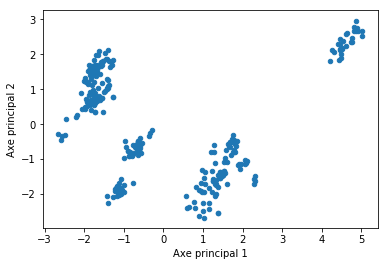

In [86]:


# Première représentation graphique sans distinction sur la variable qualitative
finaldata1.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [87]:

# Attribut pour rechercher les élements uniques d'une liste
finaldata1.brand.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

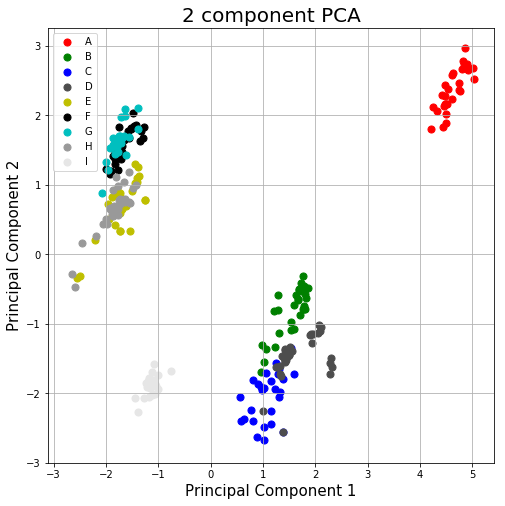

In [89]:

# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
colors = ['r', 'g', 'b','0.3','y','k','c','0.6','0.9']
for target, color in zip(targets,colors):
    indicesToKeep = finaldata1['brand'] == target
    ax.scatter(finaldata1.loc[indicesToKeep, 'Axe principal 1']
               , finaldata1.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Comme pour les TP précédents nous utiliserons les Sklearn 

In [90]:


import sklearn

In [91]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#On standardise les données
Z2 = sc.fit_transform(x)

In [92]:

#classe pour l'ACP
from sklearn.decomposition import PCA

In [93]:

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x)

In [94]:
#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)


7


In [95]:

# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
print(eigval)

[4.17178190e+00 2.29045739e+00 4.14562342e-01 9.51742273e-02
 2.76770181e-02 3.37609355e-04 9.51878034e-06]


In [96]:


#ratio de réprésentation des valeurs prores
print([ratio for ratio in acp.explained_variance_ratio_])

[0.5959688423344786, 0.32720819826580877, 0.05922319175390227, 0.013596318186805336, 0.003953859725404389, 4.8229907838475444e-05, 1.3598257621454694e-06]


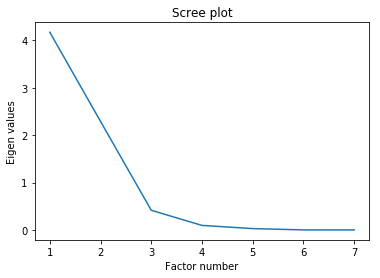

In [97]:


#scree plot
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

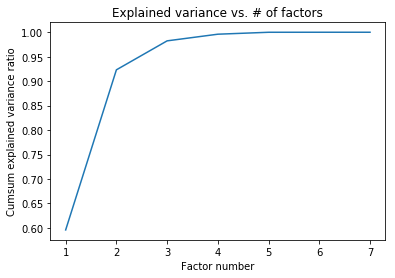

In [98]:
#cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [99]:


bs = 1/np.arange(n,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [100]:


#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.171782  2.592857
1    2.290457  1.592857
2    0.414562  1.092857
3    0.095174  0.759524
4    0.027677  0.509524
5    0.000338  0.309524
6    0.000010  0.142857


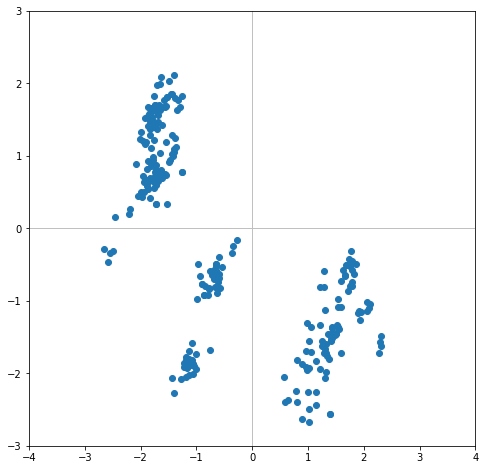

In [101]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
#for i in range(200):
     #plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
    #Vous pouvez activer les étiquettes mais ça reste encombrant
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()



In [102]:


#contribution des individus dans l'inertie totale
di = np.sum(x**2,axis=1)
print(pd.DataFrame({'ID':data1.index,'d_i':di}))


      ID        d_i
0      0  32.384714
1      1  31.816500
2      2  30.259495
3      3  25.246035
4      4  24.771480
5      5  25.077641
6      6  22.924906
7      7  28.479278
8      8  30.796560
9      9  31.246304
10    10  30.968357
11    11  31.465651
12    12  27.955068
13    13  24.905632
14    14  24.543614
15    15  29.083041
16    16  23.473236
17    17  21.307950
18    18  24.000401
19    19  26.495317
20    20  32.460159
21    21  31.061237
22    22  25.140775
23    23  22.742470
24    24  24.679827
25    25  26.355603
26    26  28.353764
27    27  25.989494
28    28  28.207181
29    29   4.866932
..   ...        ...
270  270   1.858679
271  271   1.686976
272  272   1.532336
273  273   2.193012
274  274   0.986936
275  275   1.194202
276  276   0.978920
277  277   1.946297
278  278   0.906055
279  279   1.712984
280  280   1.432553
281  281   1.144675
282  282   0.981737
283  283   1.644188
284  284   0.294823
285  285   1.510828
286  286   0.870052
287  287   0.950805


In [103]:

#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(7):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data1.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))



      id    COS2_1    COS2_2
0      0  0.775166  0.221654
1      1  0.793240  0.201070
2      2  0.763141  0.236246
3      3  0.791285  0.206819
4      4  0.807292  0.188198
5      5  0.809216  0.187422
6      6  0.812318  0.184578
7      7  0.794864  0.194423
8      8  0.765258  0.233433
9      9  0.773565  0.226193
10    10  0.756748  0.241828
11    11  0.760368  0.239033
12    12  0.760472  0.237973
13    13  0.784961  0.210871
14    14  0.812924  0.185352
15    15  0.776918  0.209289
16    16  0.841775  0.142414
17    17  0.828656  0.152307
18    18  0.842563  0.148214
19    19  0.801259  0.188545
20    20  0.726831  0.271077
21    21  0.748778  0.250015
22    22  0.812044  0.185997
23    23  0.795698  0.198451
24    24  0.816775  0.165006
25    25  0.782608  0.214938
26    26  0.757397  0.240218
27    27  0.768395  0.227940
28    28  0.800002  0.197615
29    29  0.711744  0.048507
..   ...       ...       ...
270  270  0.402630  0.457151
271  271  0.475751  0.349523
272  272  0.57

In [104]:

#contributions aux axes
ctr = coord**2
for j in range(7):
     ctr[:,j] = ctr[:,j]/(200*eigval[j])

print(pd.DataFrame({'id':data1.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))



      id     CTR_1     CTR_2
0      0  0.030087  0.015670
1      1  0.030249  0.013965
2      2  0.027677  0.015605
3      3  0.023943  0.011398
4      4  0.023968  0.010177
5      5  0.024322  0.010260
6      6  0.022319  0.009237
7      7  0.027131  0.012087
8      8  0.028246  0.015693
9      9  0.028970  0.015429
10    10  0.028088  0.016348
11    11  0.028675  0.016419
12    12  0.025480  0.014522
13    13  0.023431  0.011465
14    14  0.023913  0.009931
15    15  0.027081  0.013287
16    16  0.023682  0.007297
17    17  0.021162  0.007084
18    18  0.024236  0.007765
19    19  0.025444  0.010905
20    20  0.028277  0.019208
21    21  0.027875  0.016952
22    22  0.024468  0.010208
23    23  0.021689  0.009852
24    24  0.024160  0.008890
25    25  0.024721  0.012366
26    26  0.025738  0.014868
27    27  0.023935  0.012932
28    28  0.027046  0.012168
29    29  0.004152  0.000515
..   ...       ...       ...
270  270  0.000897  0.001855
271  271  0.000962  0.001287
272  272  0.00

In [105]:

#le champ components_ de l'objet ACP (les vecteurs propres)
print(acp.components_)



[[ 6.47093729e-02  3.78760904e-01  4.46665915e-01  4.71889526e-01
   4.35702887e-01 -4.24913712e-01  2.44487304e-01]
 [-6.28275866e-01 -2.69706650e-01  2.34379085e-01 -1.10990417e-01
   2.01661652e-01  3.20312078e-01  5.67457559e-01]
 [-4.21668945e-01  7.46027442e-01 -1.99308714e-01  5.62726863e-02
  -4.55168874e-01  5.22365058e-02  1.13315588e-01]
 [-2.20721584e-01 -1.05931982e-02 -5.07042158e-01  5.52398549e-01
   4.46276890e-01  3.34339481e-01 -2.79263154e-01]
 [-6.47029345e-03 -3.87982788e-01  1.73367634e-01  6.70885701e-01
  -6.02614079e-01  7.43689883e-03  7.80031747e-02]
 [ 4.46449902e-01 -1.71520299e-04 -5.25402868e-01  5.88609281e-02
   3.13098518e-03 -5.08853524e-04  7.21913853e-01]
 [ 4.18569035e-01  2.76764643e-01  3.77671525e-01  5.60214003e-02
  -5.24323817e-04  7.76067911e-01  1.20598098e-02]]


In [106]:

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [107]:

#corrélation des variables avec les axes
corvar = np.zeros((7,7))
for k in range(7):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

In [108]:

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 1.32168508e-01 -9.50848850e-01 -2.71497942e-01 -6.80933161e-02
  -1.07642463e-03  8.20313706e-03  1.29139098e-03]
 [ 7.73616888e-01 -4.08180979e-01  4.80341077e-01 -3.26803560e-03
  -6.45464124e-02 -3.15153954e-06  8.53888687e-04]
 [ 9.12312469e-01  3.54715333e-01 -1.28327937e-01 -1.56424131e-01
   2.88421527e-02 -9.65383064e-03  1.16521186e-03]
 [ 9.63831544e-01 -1.67975751e-01  3.62320221e-02  1.70416723e-01
   1.11611305e-01  1.08151947e-03  1.72840141e-04]
 [ 8.89920550e-01  3.05199930e-01 -2.93067379e-01  1.37677851e-01
  -1.00253357e-01  5.75291885e-05 -1.61767114e-06]
 [-8.67883723e-01  4.84768536e-01  3.36332661e-02  1.03144801e-01
   1.23723308e-03 -9.34975052e-06  2.39436513e-03]
 [ 4.99363860e-01  8.58804861e-01  7.29599592e-02 -8.61535778e-02
   1.29769290e-02  1.32645528e-02  3.72075533e-05]]


In [109]:
#Afin de récupérer les noms de variables quantitatives 
D=data1[data1.columns[2:9]]

In [110]:
#on affiche les corrélation variables-axes pour les deux premiers axes
print(pd.DataFrame({'id':D.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

       id     COR_1     COR_2
0    mois  0.132169 -0.950849
1    prot  0.773617 -0.408181
2     fat  0.912312  0.354715
3     ash  0.963832 -0.167976
4  sodium  0.889921  0.305200
5    carb -0.867884  0.484769
6     cal  0.499364  0.858805


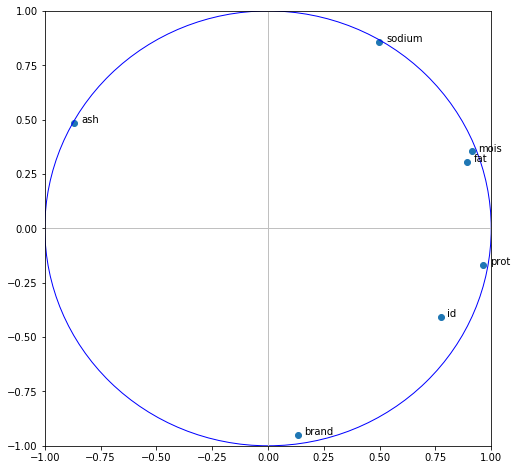

In [111]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(7):
     plt.annotate(data1.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()


## Les variables dans le cercle ne correspondent pas aux valeurs voulues.  
### Les colonnes sont décallées de 2, j'ai choisit 2:9 afin d'avoir les variavles quantitatives mais il y a 2 variables qualitatives dans le cercle et il n'y pas les 2 dernières
il n'y a pas __carb__ et __cal__ mais il y a __brand__ et __id__  
une possibilité de cette erreur est que ce ne sont que les noms des variables qui soit décalées 

# <font color='red'>Réponse question 2</font>
Les métriques conseils de retnir 7 composantes.


# <font color='red'>Réponse question 3</font>   
Le modèle est représentatif, les points correspondant aux variables sont proches du bord du cercle

## Maintenant nous allons effectuer une classification

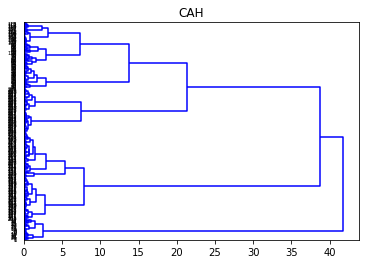

In [112]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(x,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=data1.index,orientation='right',color_threshold=0)
plt.show()





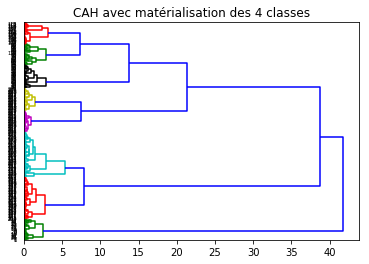

In [113]:
#

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=data1.index,orientation='right',color_threshold=7)
plt.show()


In [114]:
#découpage à la hauteur t = 7 ==> identifiants des groupes obtenus

groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5]


In [115]:
 #index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(data1.index[idg],groupes_cah[idg]))

      0
1     0
1    28
1    26
1    25
1    24
1    23
1    22
1    21
1    20
1    19
1    18
1    17
1    16
1    15
1    27
1    13
1     1
1     2
1     3
1     4
1    14
1     6
1     5
1     8
1     9
1    10
1    11
1    12
1     7
2   165
..  ...
8    96
8    99
8    98
8    97
8    88
8    93
8    92
8    91
8    90
8    89
8   100
8    94
8   101
8   108
8   103
8   104
8   105
8   106
8   107
8   109
8   110
8   111
8   112
8   113
8   114
8   115
8   116
8   117
8   102
8    87

[300 rows x 1 columns]


In [116]:

#### on compare avec une méthode k-means

In [117]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus
kmeans.fit(x)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(data1.index[idk],kmeans.labels_[idk]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]
      0
0   149
0   152
0   153
0   154
0   155
0   156
0   157
0   158
0   159
0   160
0   161
0   162
0   163
0   151
0   164
0   166
0   167
0   168
0   169
0   170
0   171
0   172
0   173
0   174
0   175
0   176
0   177
0   165
0   178
0   150
..  ...
3   298
3   239
3   241
3   242
3   243
3   244
3   245
3   246
3   247
3   248
3   249
3   250
3   251
3   268
3   252
3   254
3   25

In [118]:


#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(x), index=data1.index)
print(dist_data)

            0         1         2         3
0    6.942621  0.532855  5.455676  7.119684
1    6.930667  0.517307  5.364695  7.048537
2    6.736191  0.432470  5.307404  6.942152
3    6.331090  0.234600  4.803225  6.444723
4    6.313784  0.361064  4.712674  6.392697
5    6.349777  0.256101  4.745471  6.406929
6    6.139924  0.494693  4.528424  6.205018
7    6.643659  0.471161  5.068473  6.746476
8    6.788319  0.395076  5.351172  6.983860
9    6.836647  0.471934  5.361300  7.035557
10   6.783641  0.526396  5.374837  7.022256
11   6.831760  0.521114  5.409853  7.065013
12   6.525311  0.416543  5.109609  6.738554
13   6.292546  0.257869  4.791752  6.401130
14   6.299976  0.312027  4.682572  6.365650
15   6.682060  0.504608  5.182126  6.763371
16   6.269366  0.733311  4.496741  6.190445
17   6.037235  0.867074  4.333407  5.942950
18   6.310364  0.655699  4.543523  6.271119
19   6.481148  0.392387  4.892939  6.524251
20   6.863625  0.725149  5.572363  7.154918
21   6.782723  0.475177  5.41242

In [119]:


#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1   2   3
row_0                
1       0  29   0   0
2      58   0   0   0
3      62   0   0   0
4       0   0   0  29
5       0   0   0  32
6       0   0  31   0
7       0   0  29   0
8       0   0  30   0

[0.5091368  0.58362409 0.61268357 0.65273222 0.56716377 0.59320121
 0.58826389 0.60788017 0.59347611]


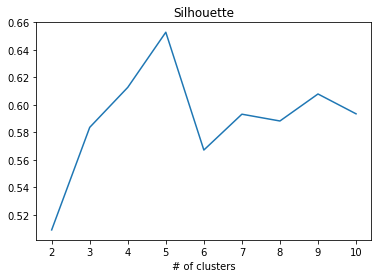

In [120]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(x)
    res[k] = metrics.silhouette_score(x,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

[ 284.89548664  499.31834651  722.57047766  907.39615247  916.50206218
  986.58538324 1182.84385155 1293.91932328 1259.2794297 ]


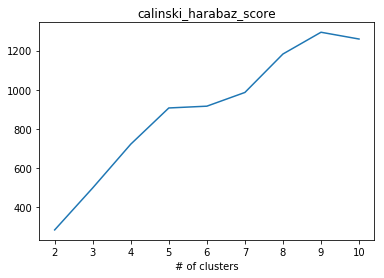

In [121]:
#utilisation de la métrique "calinski_harabaz_score"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(x)
    res[k] = metrics.calinski_harabaz_score(x,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("calinski_harabaz_score")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [122]:

#moyenne par variable

m = data1.mean()

#TSS

TSS = data1.shape[0]*data1.var(ddof=0)
print(TSS)


id        1.449618e+10
mois      2.728661e+04
prot      1.237902e+04
fat       2.408817e+04
ash       4.820472e+02
sodium    4.101229e+01
carb      9.719620e+04
cal       1.149483e+02
dtype: float64


# <font color='red'>Réponse question 6</font>  

Certaines pizza de même marques ne sont pas dans les mêmes classes. On peut le voir lorsqu'on regarde les id des pizzas dans chaque classes.

# <font color='red'>Réponse question 7</font>  
Il est judicieux d'exclure un groupe afin d'avoir une bonne classification.

# Partie 2

In [123]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

In [124]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(2)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0

# Création des données d'entrainement

In [141]:
# model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)

In [136]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()

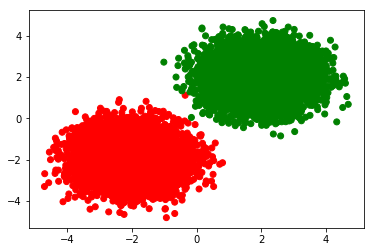

In [137]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [138]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [139]:
list(datas[0])+[labels[0]]

[-0.3357097518554908, -2.172193189260931, 0.0]

In [140]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0       -0.3357097518554908   -2.172193189260931     red
1      -0.19862567665230602  -2.5306865958486955     red
2       -2.2302510384747856  -1.3929430742355517     red
3       -2.3203753732291355    -3.13557550479573     red
4       -0.7302658796179959   -1.950186986671442     red
5       -2.7336626542821003   -2.785066968631364     red
6       -1.6523561494575998   -2.423219987971727     red
7       -1.8703603415505206  -2.0761623063723955     red
8       -1.5649821238084922  -0.6205044599993754     red
9       -1.2611473777420132  -2.4686357510791144     red
10      -2.1598640858479734   -2.048525134102521     red
11      -2.1517006147051294  -1.4331360445078707     red
12      -2.6856874583131187  -0.7183876225814756     red
13      -2.3664783930426374   -2.950297616577369     red
14       -2.671517630365399  -0.8361650256176116     red
15      -2.2656792414299427  -1.2252149686623788     red
16      -1.5045761509218352  -2.0531322588710936     red
17       -1.287355107042072  -2.4041523447392787     red
18       -2.275758656936386  -3.9567132574053474     red
19      -1.5865448178979276  -1.6052569215432948     red
20      -2.2548639103718746  -1.9439240695641264     red
21       -2.181993299700313   -1.540485115252741     red
22      -1.7291788447548544  -2.0597350564522214     red
23       -2.300519083436327  -1.2033555510840608     red
24      -2.1338857753879155  -2.1401197811311756     red
25      -2.5277629439918097   -2.160161550637699     red
26      -2.5520356623226705  -0.9302994115601306     red
27      -2.8110521028278805  -2.8755066059166525     red
28      -0.7731309782275235  -0.6218041534823215     red
29      0.05417336282829677  -1.6412010738781506     red
...                     ...                  ...     ...
19970    1.6347804447437349    1.777098633866715   green
19971     3.073352525603868   1.8512240836083533   green
19972    2.1659776699861877    2.727222100566176   green
19973    0.6439120566829184   1.0486217686507118   green
19974    2.4902790428804815   1.8756032474460378   green
19975      2.75807906545592   1.2381542525571478   green
19976    3.0839623022213107    2.285224462474809   green
19977    3.5508380431796205   1.3018822568991129   green
19978    1.1289746635361189   2.6377835002106504   green
19979    2.2006073879238857   1.3129491757488743   green
19980    1.7064651347400939   2.2485740671692622   green
19981     1.713494033514127   0.9553989127544731   green
19982     2.663404562016969     1.64008182561329   green
19983    1.0680774509455584    2.365952776159056   green
19984    3.0099832830125814   2.0801046519307733   green
19985    2.4455226147947746   1.9950344063298378   green
19986    1.5169415294689006    2.127276364345621   green
19987    3.1212669523193934   0.7315386187692685   green
19988    0.7118945056598269   1.9046047166007134   green
19989     1.416320717949329   1.7472429664360578   green
19990    1.9722124262474439   0.8862332143430951   green
19991    2.3811485773286023   2.4304007130516743   green
19992     2.026205693778082   2.9750204176145596   green
19993    3.9324506976804305    2.709825402926656   green
19994     1.777064623564484   0.9019395986571939   green
19995     2.246824720511933   2.7517122463391566   green
19996     2.257528404645242   1.4785021304229762   green
19997    2.8541808299195623    0.692277983137985   green
19998    1.0329659267663829   1.3716632299486164   green
19999    2.1231973410058456   2.4586405797294484   green

[20000 rows x 3 columns]

## Création du modèle


In [142]:
# model creation
model = tf.keras.models.Sequential()

In [143]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

In [144]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

[[0.64570963 0.3542904 ]]
Found :  0
Should be :  0.0


In [145]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [147]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [149]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 2s 130us/sample - loss: 0.0507 - acc: 0.9999 - val_loss: 0.0240 - val_acc: 0.9998
Epoch 2/10
16000/16000 [==============================] - 1s 90us/sample - loss: 0.0155 - acc: 0.9999 - val_loss: 0.0147 - val_acc: 0.9998
Epoch 3/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.0102 - acc: 0.9999 - val_loss: 0.0111 - val_acc: 0.9998
Epoch 4/10
16000/16000 [==============================] - 3s 218us/sample - loss: 0.0079 - acc: 0.9999 - val_loss: 0.0091 - val_acc: 0.9998ss: 0.0080 - acc:
Epoch 5/10
16000/16000 [==============================] - 2s 111us/sample - loss: 0.0065 - acc: 0.9999 - val_loss: 0.0078 - val_acc: 0.9998
Epoch 6/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0056 - acc: 0.9999 - val_loss: 0.0069 - val_acc: 0.9998
Epoch 7/10
16000/16000 [==============================] - 2s 100us/sample - loss: 0.0049 - acc: 0

## J'ai essayé de reproduire le modèle que l'on a vu en TP en l'adaptant avec notre ennocé mais je n'ai pas eu le __temps de finir__